#  TIỂU LUẬN / ĐỒ ÁN CUỐI KỲ  
## Phân Tích Các Yếu Tố Ảnh Hưởng Đến Kết Quả Học Tập
### MSSV: 3122411075, Họ tên: Nguyễn Thành Hưng, Lớp: DCT122C5



# Phân tích dữ liệu kết quả học tập sinh viên

## Mục tiêu
Sinh viên sử dụng Python (Matplotlib, Seaborn, Bokeh, pandas, scipy.stats) để phân tích tập dữ liệu về kết quả học tập, nhằm:
- Khám phá các yếu tố ảnh hưởng đến điểm số, như thời gian học, ngày nghỉ, giới tính.
- Áp dụng kiểm định thống kê (t test, z test, chi square) với các giả thuyết để phân tích các xu hướng.
- Đề xuất cách cải thiện hiệu suất học tập dựa trên dữ liệu.

## Tập dữ liệu
- Nguồn: UCI Machine Learning Repository.
- File: student-mat.csv (môn Toán).
- Nội dung: ~395 bản ghi, với:
  - G1, G2, G3: Điểm kỳ 1, kỳ 2, kỳ cuối (0–20).
  - studytime: Thời gian học/tuần (1: <2 giờ; 2: 2–5 giờ; 3: 5–10 giờ; 4: >10 giờ).
  - absences: Số ngày nghỉ (0–93).
  - sex: Giới tính (M/F).
  - age, freetime: Tuổi, thời gian rảnh (1–5).

## Chương 1: Khám phá và xử lý dữ liệu

### Tải và đọc dữ liệu bằng pandas


===1.1. Toàn bộ bộ dữ liệu student‑mat.csv ===


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


=== Thông tin cơ bản về dữ liệu ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     39

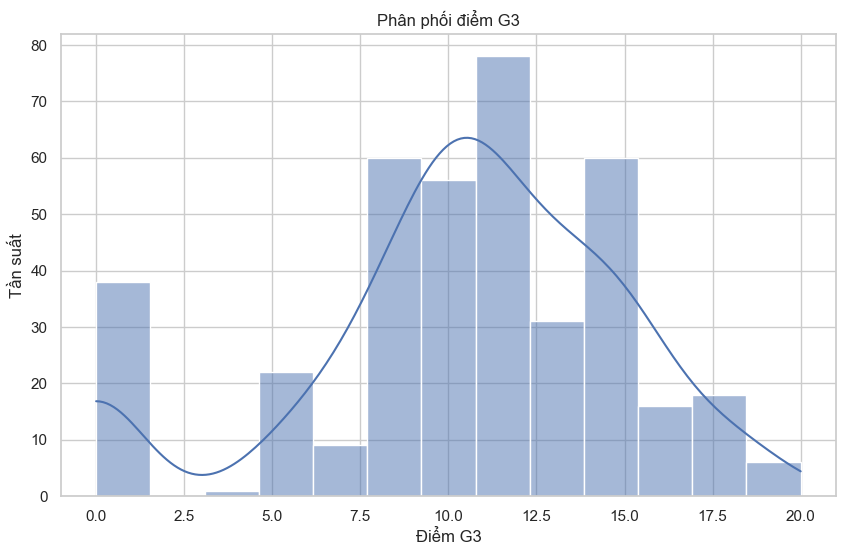

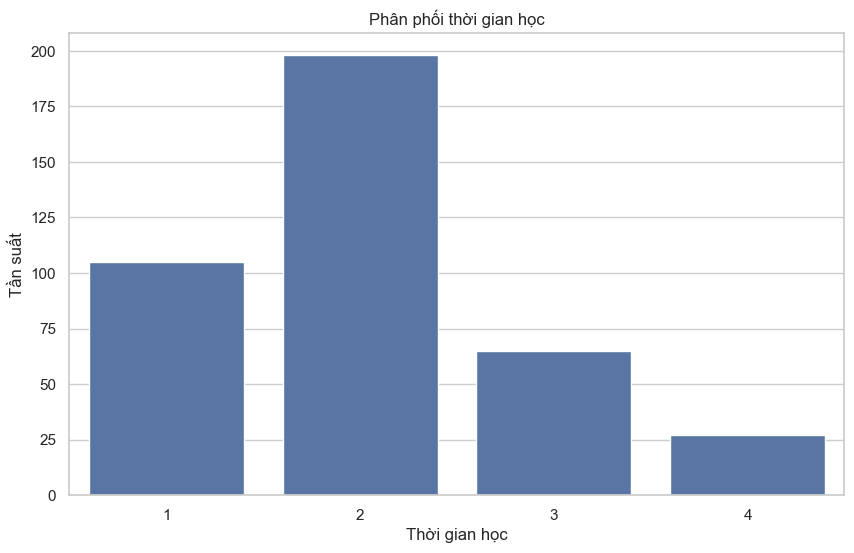


=== Báo cáo ngắn về đặc điểm dữ liệu ===
Số bản ghi: 395

Phân phối điểm G3:
G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

Phân phối thời gian học:
studytime
1    105
2    198
3     65
4     27
Name: count, dtype: int64


In [17]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# 1.1. Đọc dữ liệu từ file CSV
df = pd.read_csv('student-mat.csv', delimiter=';')

# In toàn bộ dữ liệu để kiểm tra
print("===1.1. Toàn bộ bộ dữ liệu student‑mat.csv ===")
display(df)

# Hiển thị thông tin cơ bản về dữ liệu
print("=== Thông tin cơ bản về dữ liệu ===")
print(df.info())

# 1.2. Kiểm tra và xử lý giá trị thiếu
print("\n=== 1.2. Kiểm tra giá trị thiếu ===")
missing_values = df.isnull().sum()
if missing_values.any():
    print("\nCác cột có giá trị thiếu:")
    print(missing_values[missing_values > 0])
    # Xử lý giá trị thiếu bằng cách điền giá trị trung bình cho các cột số
    for column in missing_values[missing_values > 0].index:
        if df[column].dtype != 'object':
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            df.dropna(subset=[column], inplace=True)
    print("\nĐã xử lý giá trị thiếu.")
else:
    print("\nKhông có giá trị thiếu trong bộ dữ liệu.")

# 1.3. Kiểm tra kích thước và kiểu dữ liệu
print("\n=== 1.3. Kích thước và thông tin chung ===")
print(f"Số bản ghi: {df.shape[0]}, số cột: {df.shape[1]}\n")
print(df.info())

# Thống kê mô tả cơ bản cho các biến số
print("\n=== Thống kê mô tả cơ bản ===")
print(df[['G1', 'G2', 'G3', 'studytime', 'absences', 'age', 'freetime']].describe())

# Phân tích phân phối điểm G3
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], kde=True)
plt.title('Phân phối điểm G3')
plt.xlabel('Điểm G3')
plt.ylabel('Tần suất')
plt.show()

# Phân tích phân phối thời gian học (studytime)
plt.figure(figsize=(10, 6))
sns.countplot(x='studytime', data=df)
plt.title('Phân phối thời gian học')
plt.xlabel('Thời gian học')
plt.ylabel('Tần suất')
plt.show()

# Báo cáo ngắn về đặc điểm dữ liệu
print("\n=== Báo cáo ngắn về đặc điểm dữ liệu ===")
print(f"Số bản ghi: {df.shape[0]}")
print("\nPhân phối điểm G3:")
print(df['G3'].value_counts().sort_index())

print("\nPhân phối thời gian học:")
print(df['studytime'].value_counts().sort_index())


### **Báo cáo tổng quan dữ liệu sinh viên môn Toán**

---

#### **1. Thông tin khái quát**
- **Tập dữ liệu:** `student-mat.csv`, chứa dữ liệu liên quan đến học sinh học môn Toán.
- **Tổng số mẫu:** 395 học sinh.
- **Số lượng biến (cột):** 33 thuộc tính, bao gồm thông tin cá nhân, học tập, hành vi, điểm số,...
- **Thiếu dữ liệu:** Không phát hiện giá trị thiếu trong bất kỳ cột nào.

---

#### **2. Phân tích điểm số G3 (điểm cuối kỳ)**  
Dữ liệu điểm G3 được tính theo thang điểm 20, dao động từ 0 đến 20 điểm.

| Thống kê           | Giá trị |
|--------------------|--------:|
| Trung bình         | 10.42   |
| Độ lệch chuẩn      | 4.58    |
| Thấp nhất (Min)    | 0       |
| Phân vị thứ 25 (Q1)| 8       |
| Trung vị (Q2)      | 11      |
| Phân vị thứ 75 (Q3)| 14      |
| Cao nhất (Max)     | 20      |

➡️ **Nhận xét:** Phổ điểm G3 nghiêng nhẹ về trái, với phần lớn học sinh đạt điểm trong khoảng từ 8 đến 14. Một số học sinh có điểm số rất thấp, thậm chí bằng 0.

---

#### **3. Thời gian học mỗi tuần (studytime)**

| Mức độ | Thời lượng học mỗi tuần | Số học sinh |
|--------|--------------------------|-------------|
| 1      | Dưới 2 giờ               | 105         |
| 2      | 2 – 5 giờ                | 198         |
| 3      | 5 – 10 giờ               | 65          |
| 4      | Trên 10 giờ              | 27          |

➡️ **Nhận xét:** Phần lớn học sinh dành 2–5 giờ để học thêm mỗi tuần. Rất ít học sinh vượt qua mức 10 giờ.

---

#### **4. Phân bố độ tuổi (age)**
- **Tuổi trung bình:** 16.70  
- **Khoảng tuổi:** từ 15 đến 22  
- **Tập trung chủ yếu:** 16–18 tuổi  
- **75% học sinh có độ tuổi:** không quá 18  

---

#### **5. Số ngày nghỉ học (absences)**
- **Trung bình:** 5.71 ngày  
- **Độ lệch chuẩn:** 8.00  
- **Tối thiểu:** 0 ngày  
- **Tối đa:** 75 ngày  
- **Trung vị:** 4 ngày  
- **75% học sinh nghỉ ≤ 8 ngày**

➡️ **Nhận xét:** Số ngày nghỉ phân bố không đều, một số học sinh nghỉ học rất nhiều trong khi phần lớn nghỉ ít.

---

#### **6. Phân bố giới tính (sex)**

| Giới tính | Số lượng |
|-----------|---------:|
| Nam (M)   | 187      |
| Nữ (F)    | 208      |

➡️ **Nhận xét:** Giới tính được phân bố tương đối đều, tuy nhiên học sinh nữ chiếm tỷ lệ cao hơn một chút (~52.7%).

---

#### **7. Mức độ thời gian rảnh (freetime)**

| Mức độ (1–5) | Số học sinh |
|--------------|-------------|
| 1            | 19          |
| 2            | 64          |
| 3            | 157         |
| 4            | 115         |
| 5            | 40          |

➡️ **Nhận xét:** Phần lớn học sinh tự đánh giá thời gian rảnh ở mức trung bình khá (mức 3 và 4).

---

### **Tổng kết ban đầu**
Dữ liệu phản ánh một cách đầy đủ các khía cạnh học sinh: từ thông tin cá nhân đến yếu tố học tập như điểm số, thời gian học và nghỉ học. Những yếu tố như số giờ học mỗi tuần, số ngày nghỉ và giới tính có khả năng ảnh hưởng đến kết quả học tập (điểm G3) và sẽ được phân tích kỹ hơn trong các phần tiếp theo.



## **Chương 2: Trực quan hóa dữ liệu**

### **1. Trực quan với Matplotlib**
#### **Biểu đồ cột: Số học sinh theo studytime**

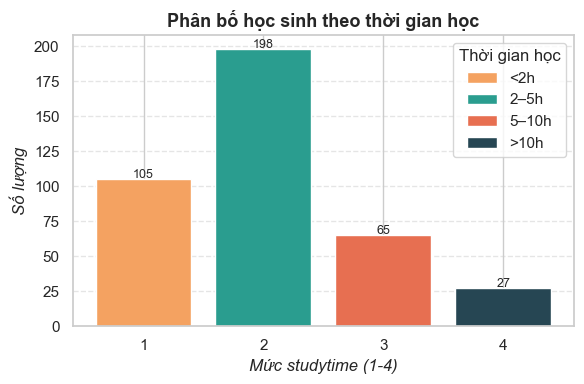

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Đếm số lượng theo studytime
study_counts = df["studytime"].value_counts().sort_index()
color_map = ["#F4A261", "#2A9D8F", "#E76F51", "#264653"]

plt.figure(figsize=(6, 4))
bars = plt.bar(study_counts.index.astype(str), study_counts.values, color=color_map)

# Ghi nhãn và tiêu đề
plt.title("Phân bố học sinh theo thời gian học", fontsize=13, fontweight='bold')
plt.xlabel("Mức studytime (1-4)", fontstyle='italic')
plt.ylabel("Số lượng", fontstyle='italic')

# Ghi số lượng trên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)),
             ha='center', fontsize=9)

# Chú thích
labels = ["<2h", "2–5h", "5–10h", ">10h"]
plt.legend(bars, labels, title="Thời gian học", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


⟶ Phần lớn học sinh có xu hướng học ở mức vừa phải (2–5 giờ/tuần), rất ít em học quá nhiều (>10 giờ/tuần).

**2. Biểu đồ phân tán:** studytime và G3 theo giới tính

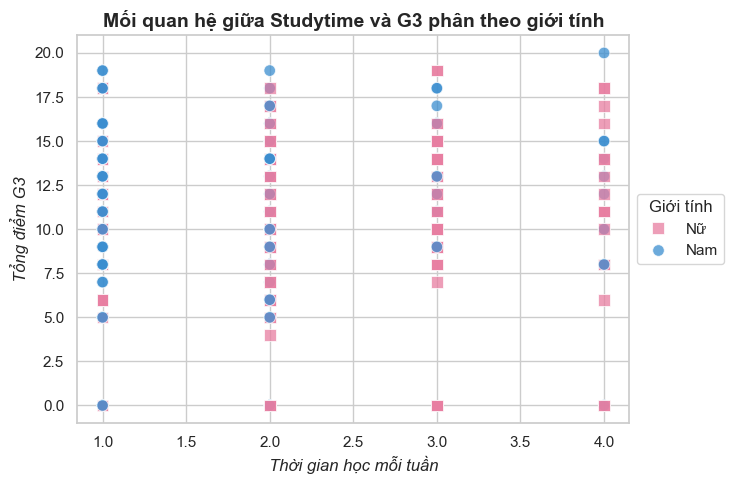

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Đọc dữ liệu
du_lieu = pd.read_csv("student-mat.csv", delimiter=";")

# Thêm nhãn phân loại điểm
du_lieu["loai_diem"] = np.where(du_lieu["G3"] >= 12, "Cao", "Thấp")

# Thiết lập kiểu hiển thị
sns.set_theme(style="whitegrid")

# Vẽ biểu đồ scatter với seaborn
plt.figure(figsize=(7.5, 5))
bieu_do = sns.scatterplot(
    data=du_lieu,
    x="studytime",
    y="G3",
    hue="sex",
    style="sex",
    palette={"M": "#3B8ED0", "F": "#E87EA1"},
    markers={"M": "o", "F": "s"},
    s=70,
    alpha=0.75
)

# Tùy chỉnh tiêu đề và trục
plt.title("Mối quan hệ giữa Studytime và G3 phân theo giới tính", fontsize=14, weight='bold')
plt.xlabel("Thời gian học mỗi tuần", fontsize=12, style='italic')
plt.ylabel("Tổng điểm G3", fontsize=12, style='italic')

# Tùy chỉnh legend
handles, labels = bieu_do.get_legend_handles_labels()
nhan_moi = {"M": "Nam", "F": "Nữ"}
labels_moi = [nhan_moi.get(lbl, lbl) for lbl in labels]
plt.legend(handles=handles, labels=labels_moi, title="Giới tính", loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


⟶ Nhìn chung, điểm `G3` có xu hướng tăng khi thời gian học (`studytime`) tăng, đặc biệt rõ từ mức học ≥ 5 giờ/tuần.
- **Sự khác biệt giới tính rõ nhất xuất hiện ở mức studytime thấp:** nữ sinh có xu hướng phân tán điểm nhiều hơn, trong khi nam sinh tập trung vào dải điểm hẹp hơn.
- **Nữ (màu hồng)** có phổ điểm rộng tại mỗi mức studytime, thể hiện sự biến động trong kết quả học tập – có cả học sinh đạt điểm rất thấp lẫn khá cao.
- **Nam (màu xanh)** có số lượng ít hơn nhưng lại có những điểm cao nhất (G3 = 20), cho thấy vẫn có các cá nhân nam nổi bật về thành tích.
- **Đa phần học sinh tập trung ở mức 2–3 (2–10 giờ/tuần)**, gợi ý đây là khoảng thời gian học tối ưu để vừa duy trì hiệu quả học tập vừa đảm bảo cân bằng sinh hoạt.

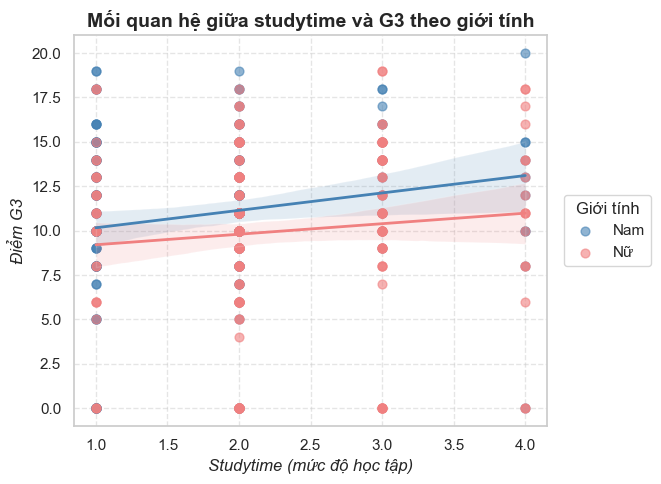

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("student-mat.csv", sep=";")

# Ánh xạ giới tính sang tiếng Việt
df["gioi_tinh"] = df["sex"].map({"M": "Nam", "F": "Nữ"})

# Tạo figure và axis
plt.figure(figsize=(8, 5))

# Vẽ từng nhóm giới tính bằng regplot
palette = {"Nam": "steelblue", "Nữ": "lightcoral"}
for gioi_tinh, color in palette.items():
    du_lieu_nhom = df[df["gioi_tinh"] == gioi_tinh]
    sns.regplot(
        x="studytime", y="G3", data=du_lieu_nhom,
        scatter=True, label=f"{gioi_tinh}", color=color,
        scatter_kws={"s": 40, "alpha": 0.6},
        line_kws={"linewidth": 2}
    )

# Thêm tiêu đề và nhãn trục
plt.title("Mối quan hệ giữa studytime và G3 theo giới tính", fontsize=14, fontweight='bold')
plt.xlabel("Studytime (mức độ học tập)", fontsize=12, fontstyle='italic')
plt.ylabel("Điểm G3", fontsize=12, fontstyle='italic')

# Chú thích rõ ràng
plt.legend(title="Giới tính", loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True)

# Lưới nhẹ
plt.grid(True, linestyle="--", alpha=0.5)

# Canh lề phải để chú thích không bị cắt
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Hiển thị biểu đồ
plt.show()


###  **Nhận xét biểu đồ: Mối quan hệ giữa *studytime* và điểm *G3* theo giới tính**

Biểu đồ trên thể hiện mối quan hệ giữa **mức độ học tập (studytime)** và **điểm số cuối kỳ (G3)**, phân theo giới tính **Nam** và **Nữ**.

####  Nhận xét chính:
- **Xu hướng chung**: Cả hai giới tính đều có xu hướng điểm G3 tăng khi *studytime* tăng, tức là thời gian học nhiều hơn có liên quan đến kết quả học tập cao hơn.
- **So sánh giới tính**:
  - **Nam sinh**: Có xu hướng điểm G3 tăng nhanh hơn khi *studytime* tăng, thể hiện qua đường hồi quy dốc hơn.
  - **Nữ sinh**: Cũng có sự gia tăng điểm G3 theo thời gian học, nhưng mức tăng nhẹ hơn so với nam.
- **Độ phân tán**:
  - Có sự phân tán điểm khá lớn ở mọi mức *studytime*, cho thấy thời gian học không phải là yếu tố duy nhất ảnh hưởng đến điểm G3.
  - Một số học sinh dù học nhiều (mức 3–4) nhưng vẫn đạt điểm thấp → cần xem xét thêm các yếu tố khác như phương pháp học, sự hỗ trợ, động lực cá nhân, v.v.

####  Kết luận:
- **Studytime có ảnh hưởng tích cực đến điểm số**, đặc biệt rõ ở nhóm nam sinh.
- Tuy nhiên, mối quan hệ không hoàn toàn tuyến tính và còn phụ thuộc vào nhiều yếu tố khác.


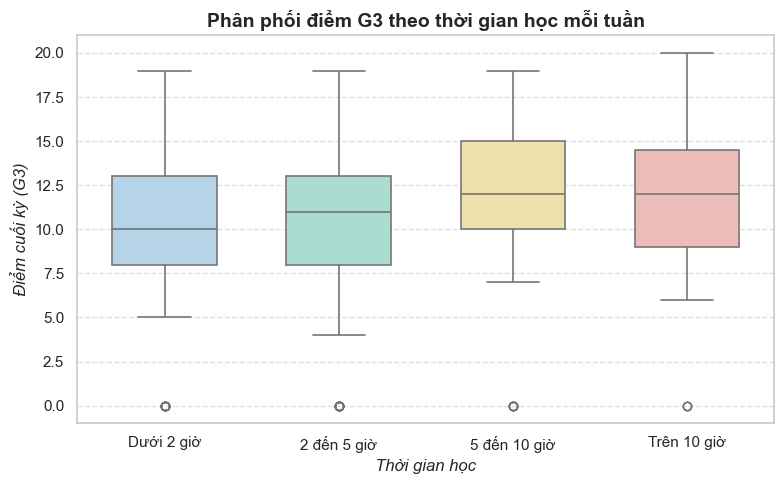

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Tải dữ liệu
du_lieu = pd.read_csv("student-mat.csv", delimiter=";")

# Gán nhãn cho thời gian học
muc_thoi_gian = {
    1: "Dưới 2 giờ",
    2: "2 đến 5 giờ",
    3: "5 đến 10 giờ",
    4: "Trên 10 giờ"
}
du_lieu["nhan_thoi_gian"] = du_lieu["studytime"].map(muc_thoi_gian)
thu_tu = ["Dưới 2 giờ", "2 đến 5 giờ", "5 đến 10 giờ", "Trên 10 giờ"]
du_lieu["nhan_thoi_gian"] = pd.Categorical(du_lieu["nhan_thoi_gian"], categories=thu_tu, ordered=True)

# Thiết lập phong cách
sns.set_style("whitegrid")
palette_moi = sns.color_palette(["#AED6F1", "#A3E4D7", "#F9E79F", "#F5B7B1"])

# Vẽ biểu đồ boxplot đúng cách
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=du_lieu,
    x="nhan_thoi_gian",
    y="G3",
    hue="nhan_thoi_gian",      # Thêm hue bằng chính x
    palette=palette_moi,
    width=0.6,
    linewidth=1.2,
    dodge=False                # Không dịch các boxplot
)

# Tắt legend vì trùng lặp với trục x
plt.legend([], [], frameon=False)

# Tiêu đề và trục
plt.title("Phân phối điểm G3 theo thời gian học mỗi tuần", fontsize=14, fontweight='bold')
plt.xlabel("Thời gian học", fontsize=12, style='italic')
plt.ylabel("Điểm cuối kỳ (G3)", fontsize=12, style='italic')

# Hiển thị lưới dọc
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Tránh cắt lề
plt.tight_layout()

# Hiển thị
plt.show()


###  **Nhận xét biểu đồ: Phân phối điểm G3 theo thời gian học mỗi tuần**

Biểu đồ boxplot trên mô tả phân phối **điểm cuối kỳ (G3)** theo các mức **thời gian học mỗi tuần**.

####  **Nhận xét chính:**
- **Tăng thời gian học thường dẫn đến điểm số cao hơn**:
  - Học từ **5 đến 10 giờ/tuần** và **trên 10 giờ/tuần** có **median (trung vị)** cao hơn so với các nhóm còn lại.
  - Nhóm học từ **5 đến 10 giờ** có median rõ ràng cao nhất.
- **Độ phân tán**:
  - Mọi nhóm đều có độ phân tán điểm rộng (hộp lớn), phản ánh sự khác biệt về hiệu quả học tập trong cùng một nhóm thời gian học.
  - Xuất hiện nhiều **outliers (điểm ngoại lệ)** ở mức thấp trong tất cả các nhóm → Một số học sinh học nhiều nhưng vẫn điểm thấp.
- **So sánh giữa các nhóm**:
  - Nhóm học **dưới 2 giờ** có điểm trung bình thấp nhất và nhiều học sinh điểm dưới 10.
  - Các nhóm còn lại cho thấy sự cải thiện nhẹ về điểm trung bình nhưng không quá chênh lệch lớn.

#### **Kết luận:**
- Thời gian học mỗi tuần có ảnh hưởng tích cực đến điểm số, **đặc biệt rõ ở nhóm từ 5 đến 10 giờ**.
- Tuy nhiên, thời gian học **không phải yếu tố duy nhất** quyết định điểm số — cần kết hợp phương pháp học hiệu quả, chất lượng học và động lực cá nhân.



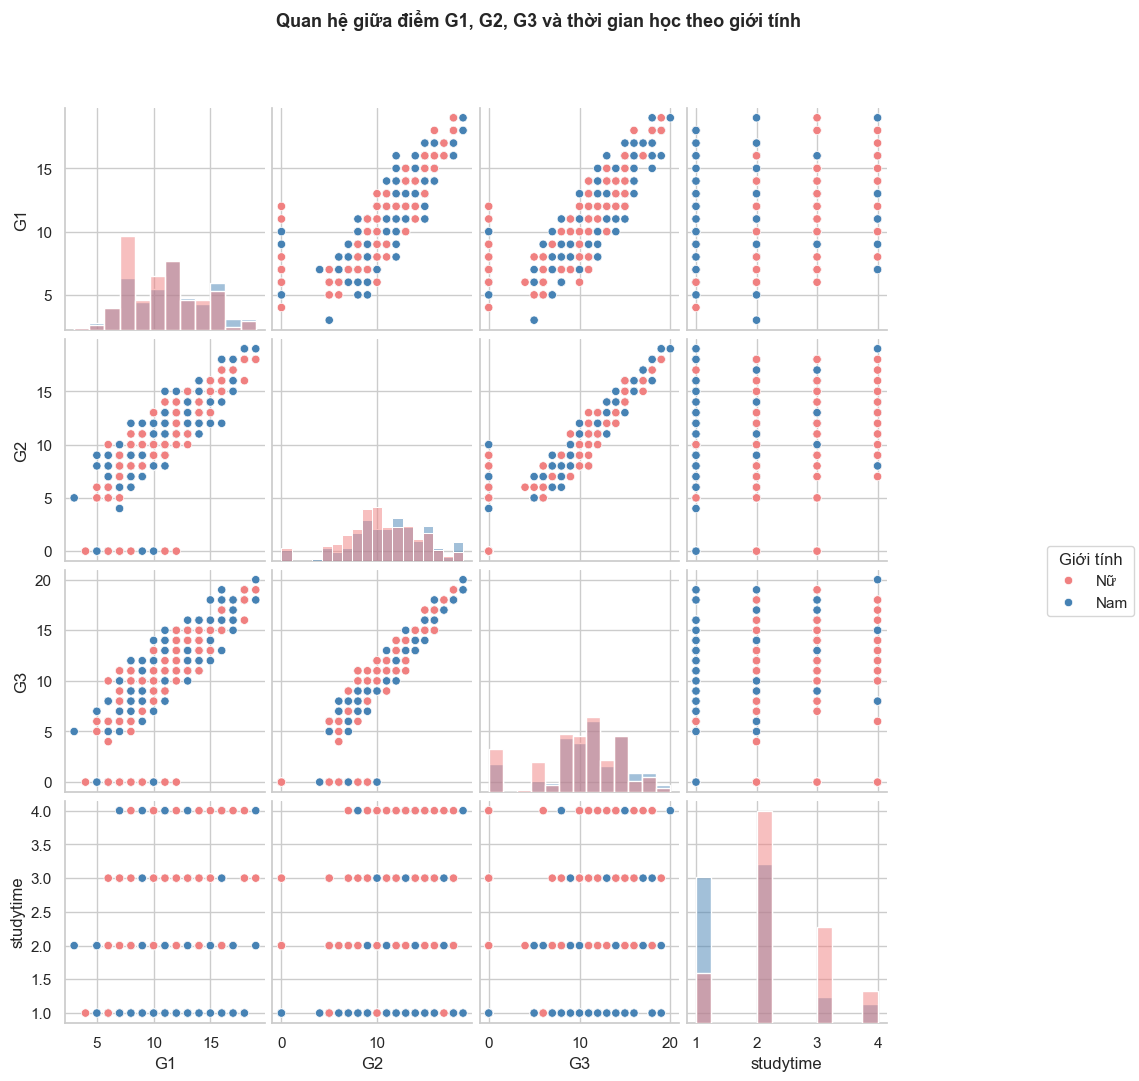

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu và chuẩn bị
du_lieu = pd.read_csv("student-mat.csv", sep=";")
du_lieu_phu = du_lieu[["G1", "G2", "G3", "studytime", "sex"]].copy()
du_lieu_phu["gioi_tinh"] = du_lieu_phu["sex"].map({"M": "Nam", "F": "Nữ"})

# Tạo biểu đồ pairplot
plot = sns.pairplot(
    data=du_lieu_phu,
    vars=["G1", "G2", "G3", "studytime"],
    hue="gioi_tinh",
    palette={"Nam": "steelblue", "Nữ": "lightcoral"},
    diag_kind="hist",
    height=2.5
)

# Thêm tiêu đề phía trên
plot.fig.suptitle(
    "Quan hệ giữa điểm G1, G2, G3 và thời gian học theo giới tính",
    fontsize=13, fontweight='bold', y=1.08
)

# Đưa chú thích ra ngoài nhưng gần biểu đồ hơn
plot._legend.set_bbox_to_anchor((1.05, 0.5))  # gần hơn (từ 1.15 → 1.05)
plot._legend.set_title("Giới tính")
plot._legend.set_frame_on(True)

# Giãn lề phải vừa đủ để không cắt
plot.fig.subplots_adjust(right=0.82)

# Hiển thị biểu đồ
plt.show()


### Nhận xét biểu đồ: Quan hệ giữa điểm G1, G2, G3 và thời gian học theo giới tính

Biểu đồ **pairplot** trên thể hiện mối quan hệ giữa:
- Ba cột điểm số: **G1**, **G2**, **G3**
- Cột **thời gian học (studytime)**  
→ Phân tích theo **giới tính** (Nam, Nữ)

#### 1. Quan hệ giữa các cột điểm số
- **G1, G2 và G3** có quan hệ tuyến tính rõ rệt với nhau:
  - Học sinh có điểm G1 cao thường có G2 và G3 cao.
  - Các điểm gần như tạo thành đường chéo trong từng cặp G1-G2, G2-G3.
- → Cho thấy **sự nhất quán trong học lực** qua các kỳ.

#### 2. Sự khác biệt giới tính
- **Cả Nam và Nữ** có phân bố điểm khá tương đồng.
- Không có sự khác biệt rõ ràng về điểm số giữa hai giới.
- Tuy nhiên, ở một số vùng điểm cao, **nữ sinh có vẻ chiếm ưu thế hơn một chút**.

#### 3. Thời gian học (studytime)
- **Học sinh nữ có xu hướng học nhiều thời gian hơn**:
  - Nhóm nữ xuất hiện nhiều ở mức **3 (5–10 giờ)** và **4 (trên 10 giờ)**.
- **Nam giới tập trung nhiều hơn ở mức 1 và 2**, tức là học dưới 5 giờ mỗi tuần.

#### 4. Tổng kết
- Điểm số phản ánh rõ mối quan hệ tăng dần giữa các kỳ học.
- Giới tính không phải yếu tố ảnh hưởng mạnh đến điểm, nhưng có sự khác biệt nhỏ về **thời gian học tập**.
- Gợi ý rằng để nâng cao điểm số, cần duy trì học đều qua các kỳ và **tăng thời gian học** nếu cần cải thiện.



In [23]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS
from bokeh.layouts import column, row

output_notebook()

# Assuming df is your DataFrame
df["sex_label"] = df["sex"].map({"M": "Nam", "F": "Nữ"})
df["study_label"] = df["studytime"].map({1: "<2h", 2: "2–5h", 3: "5–10h", 4: ">10h"})

# Dữ liệu cho biểu đồ cột
bar_data = df["studytime"].value_counts().sort_index().reset_index()
bar_data.columns = ["studytime", "count"]
bar_data["studytime"] = bar_data["studytime"].astype(str)
bar_data["color"] = ["#F4A261", "#2A9D8F", "#E76F51", "#264653"]

bar_source = ColumnDataSource(bar_data)
bar_fig = figure(title="Số học sinh theo studytime", x_range=bar_data["studytime"],
                 height=400, width=400, x_axis_label="Studytime", y_axis_label="Số học sinh")
bar_fig.vbar(x='studytime', top='count', width=0.6, color='color', source=bar_source)

# Dữ liệu cho scatter
# Add a visibility column to control display without losing data
df_male = df[df["sex"] == "M"].copy()
df_female = df[df["sex"] == "F"].copy()
df_male["visible"] = True
df_female["visible"] = True

source_male = ColumnDataSource(df_male)
source_female = ColumnDataSource(df_female)

scatter_fig = figure(title="Studytime và G3 (tương tác)", height=400, width=500,
                     x_axis_label="Studytime", y_axis_label="G3")

# Use non-visible alpha to hide points instead of setting data to null
scatter_fig.scatter(x='studytime', y='G3', source=source_male, size=6, color="blue",
                    alpha=0.5, legend_label="Nam", nonselection_alpha=0.0, selection_alpha=0.5)
scatter_fig.scatter(x='studytime', y='G3', source=source_female, size=6, color="pink",
                    alpha=0.5, legend_label="Nữ", nonselection_alpha=0.0, selection_alpha=0.5)

hover = HoverTool(tooltips=[
    ("Tuổi", "@age"),
    ("Giới tính", "@sex_label"),
    ("Vắng học", "@absences"),
    ("G3", "@G3"),
])
scatter_fig.add_tools(hover)
scatter_fig.legend.click_policy = "hide"

# Slider
slider = Slider(start=1, end=4, value=1, step=1, title="Lọc studytime ≥")

# Updated callback to toggle visibility without modifying original data
callback = CustomJS(args=dict(male=source_male, female=source_female, slider=slider), code="""
    const threshold = slider.value;
    [male, female].forEach(source => {
        const data = source.data;
        const indices = [];
        for (let i = 0; i < data["studytime"].length; i++) {
            const isVisible = data["studytime"][i] >= threshold;
            data["visible"][i] = isVisible;
            if (isVisible) {
                indices.push(i);
            }
        }
        source.selected.indices = indices;
        source.change.emit();
    });
""")
slider.js_on_change('value', callback)

# Hiển thị
show(column(row(bar_fig, scatter_fig), slider))

Loading BokehJS ...

### **Nhận xét biểu đồ: Quan hệ giữa thời gian học (studytime) và điểm G3 theo giới tính**

Biểu đồ gồm hai phần chính:  
- **Biểu đồ cột**: Số học sinh theo thời gian học (studytime).  
- **Biểu đồ phân tán**: Mối quan hệ giữa thời gian học (studytime) và điểm G3, phân tích theo giới tính (Nam, Nữ).

#### **1. Phân bố thời gian học (Biểu đồ cột)**
- Nhóm học **2–5h** có số học sinh đông nhất, khoảng **200 học sinh**.  
- Nhóm học **dưới 2h** đứng thứ hai với khoảng **100 học sinh**.  
- Nhóm học **5–10h** và **trên 10h** có số lượng ít hơn, lần lượt khoảng **50** và **dưới 50 học sinh**.  
→ Phần lớn học sinh tập trung ở mức thời gian học trung bình (2–5h).

#### **2. Mối quan hệ giữa thời gian học và điểm G3 (Biểu đồ phân tán)**
- Điểm G3 của **học sinh nam (xanh)** và **học sinh nữ (hồng)** phân bố khá đều qua các mức thời gian học.  
- Không có sự khác biệt rõ rệt về điểm G3 giữa nam và nữ ở từng mức studytime.  
- Điểm G3 dao động từ **0 đến 20**, nhưng không có xu hướng tăng rõ ràng khi thời gian học tăng.  
→ Thời gian học không phải yếu tố quyết định trực tiếp đến điểm G3.

#### **3. Tổng kết**
- Học sinh chủ yếu học trong khoảng **2–5h mỗi tuần**, với số ít dành thời gian học trên 10h.  
- Không có sự khác biệt lớn về điểm G3 giữa nam và nữ, và thời gian học không ảnh hưởng mạnh đến điểm số.  
- Gợi ý: Cần xem xét thêm các yếu tố khác (như phương pháp học) để cải thiện điểm G3, thay vì chỉ tăng thời gian học.